In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import numpy as np
import scipy.spatial.distance as ds
from bagOfFeatures.bofFunctions import ImagePrep

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import PIL.Image as Image

import numpy as np
import os
from matplotlib.patches import Circle, Rectangle
from matplotlib.lines import Line2D


In [27]:
import numpy as np

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
np.dot(X, np.array([1, 2]))

array([3, 5, 6, 8])

In [23]:
from Eval import Eval

resultList, configurationListProduct = Eval.evaluation()
configurationListProduct

[[5, 3, 5],
 [5, 3, 8],
 [5, 6, 5],
 [5, 6, 8],
 [5, 9, 5],
 [5, 9, 8],
 [25, 3, 5],
 [25, 3, 8],
 [25, 6, 5],
 [25, 6, 8],
 [25, 9, 5],
 [25, 9, 8],
 [45, 3, 5],
 [45, 3, 8],
 [45, 6, 5],
 [45, 6, 8],
 [45, 9, 5],
 [45, 9, 8]]

In [20]:
np.array(resultList)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from bagOfFeatures import segmentation
from bagOfFeatures.segmentation import Segmentation
from common import features
from scipy.cluster.vq import kmeans2
documentSegmentation=os.path.join('GT', '2700270.gtp')
documentImage=os.path.join('pages', '2700270.png')
image=Image.open(documentImage)
imageArray = np.array(image)

wordImageList = segmentation.Segmentation.segmentCut(image, documentSegmentation)


step_size=15
cell_size=3
n_centroids=4

frames, desc = features.compute_sift_descriptors(np.array(image),
                                                 step_size=step_size,
                                                 cell_size=cell_size)

centroids, labels = kmeans2(desc, n_centroids, iter=20, minit='points')


word=wordImageList[0][0]
frames1, desc1 = features.compute_sift_descriptors(np.array(image),
                                                 step_size=40,
                                                 cell_size=20)

print(len(desc1))
lae=int(len(desc1)/2)


distances = ds.cdist(desc1, centroids, metric='euclidean')

sortiert2d = np.argsort(distances, axis=1)
globa1 = sortiert2d[:, 0]
histGlobal1 = np.bincount(globa1, minlength=len(centroids))

left = globa1[:int(len(globa1) / 2)]
histLeft = np.bincount(left, minlength=len(centroids) )

right = globa1[int(len(globa1) / 2):]
histRight = np.bincount(right, minlength=len(centroids) )

print(histRight)
print(histLeft)
print(histGlobal1)
hist = histGlobal1+histLeft+histRight
hist

In [52]:
distances = ds.cdist(desc1, centroids, metric='euclidean')
print(distances)
sortiert2d = np.argsort(distances, axis=1)
print(sortiert2d)
x=sortiert2d[:, 0]
print(x)
hist = np.bincount(x, minlength=len(centroids))


[[429.2032265  320.221682   555.58819717 514.16985874]
 [429.20010272 449.59943145 579.39431453 569.0984215 ]
 [388.02113429 541.27642375 544.77073253 572.10208553]
 ...
 [405.86544633 551.45747296 602.71607871 585.6208674 ]
 [493.88790683 558.188153   604.59345538 575.01324804]
 [309.59716935 339.54884667 349.90166479 317.61788785]]
[[1 0 3 2]
 [0 1 3 2]
 [0 1 2 3]
 ...
 [0 1 3 2]
 [0 1 3 2]
 [0 3 1 2]]
[1 0 0 ... 0 0 0]


In [4]:
#plt.figure()
#wordImageList[2][0].show()

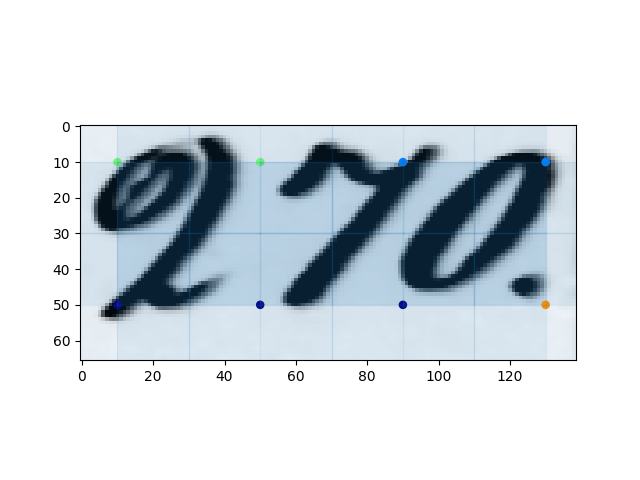

In [31]:



from matplotlib.patches import Circle, Rectangle
from matplotlib.lines import Line2D

draw_descriptor_cells = True
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.array(word), cmap=cm.get_cmap('Greys_r'))
ax.autoscale(enable=False)
colormap = cm.get_cmap('jet')
desc_len = cell_size * 4
for (x, y), label in zip(frames, labels):
    color = colormap(label / float(n_centroids))
    circle = Circle((x, y), radius=1, fc=color, ec=color, alpha=1)
    rect = Rectangle((x - desc_len / 2, y - desc_len / 2),
                     desc_len, desc_len, alpha=0.08, lw=1)
    ax.add_patch(circle)
    if draw_descriptor_cells:
        for p_factor in [0.25, 0.5, 0.75]:
            offset_dyn = desc_len * (0.5 - p_factor)
            offset_stat = desc_len * 0.5
            line_h = Line2D((x - offset_stat, x + offset_stat),
                            (y - offset_dyn, y - offset_dyn), alpha=0.08, lw=1)
            line_v = Line2D((x - offset_dyn, x - offset_dyn),
                            (y - offset_stat, y + offset_stat), alpha=0.08, lw=1)
            ax.add_line(line_h)
            ax.add_line(line_v)
    ax.add_patch(rect)
plt.show()

In [61]:
x=np.concatenate(([1,2,0],[4,5,5,0]))
x

array([1, 2, 0, 4, 5, 5, 0])

In [ ]:
        # init.
histograms = []
namesOfWords = []
# For all Images:
# - Change Color scale to gray
# - build SIFT representation
for word in wordImageList:
    image = np.array(word[0])
    frames, desc = features.compute_sift_descriptors(image,
                                                     step_size=step_size,
                                                     cell_size=cell_size)

    distances = ds.cdist(desc, centroids, metric='euclidean')

    sortiert2d = np.argsort(distances, axis=1)

    hist = np.bincount(sortiert2d[:, 0], minlength=len(centroids))

    histograms.append(hist)

    namesOfWords.append(word[1])





In [ ]:
1
